# Problem Statement
Company  X  owns  a  movie  application  and  repository  which  caters  movie  streaming  to  millions  of  users  who  on  subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene. 

Task: 
Help to create an image dataset to be used by the AI team to build an image classifier data. Profile images of people are given. 

## Installing OpenCv2

In [12]:
!pip install opencv-python
import cv2
# print version number
print(cv2.__version__)


4.5.1


### Downloding and installing the Frontal face Package from Cv2

In [19]:
# load the pre-trained model
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') ## File was downloaded and love to the same directory

### Getting list of all the files in the directory

In [20]:
import os
images = os.listdir("/Users/cashwin/Desktop/CVP II/training_images 2") 

In [42]:
len(images) # checking number of images

1095

## Predicting the bounding box for the faces

In [54]:
final_result = []
for img in range(0,len(images)):
    pixels = cv2.imread(images[img])
    bboxes = classifier.detectMultiScale(pixels)
    for box in bboxes:
        x, y, width, height = box
        final_result.append([images[img],x, y, width, height])

### Displaying the Bounding Box Details 

In [55]:
import pandas as pd
final_result_pd = pd.DataFrame(final_result, columns = ['File Name','X','Y','Width','Height'])
display(final_result_pd)

File Name    X    Y  Width  Height
0        real_00251.jpg   93  140    391     391
1        real_00537.jpg   56   78    473     473
2        real_00523.jpg  116  151    382     382
3        real_00245.jpg   82  135    395     395
4        real_00279.jpg  153  211    371     371
...                 ...  ...  ...    ...     ...
1081     real_00506.jpg   92   53    485     485
1082     real_00512.jpg   57   26    494     494
1083     real_00274.jpg   80  156    426     426
1084  real_01007(1).jpg   74   54    464     464
1085     real_00248.jpg  129  180    362     362

[1086 rows x 5 columns]

### Testing The Result

real_00279.jpg


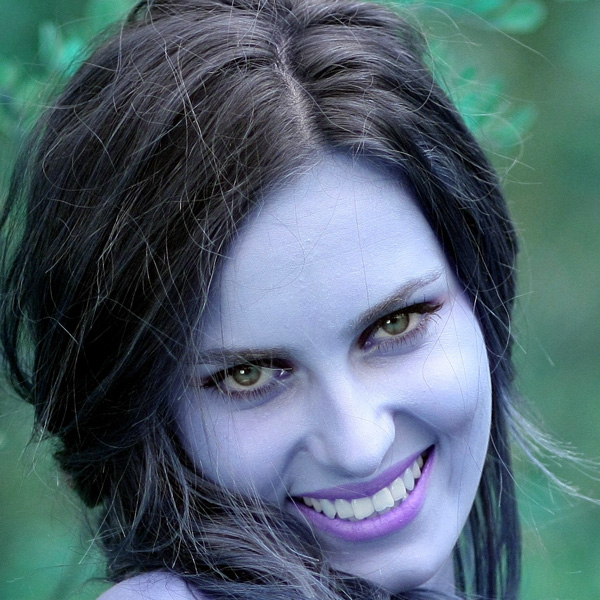

In [57]:
import numpy as np
from PIL import Image
print(images[4])

image_display = Image.fromarray(cv2.imread(images[4]))
image_display

In [58]:
final_result[4][2]

211

In [61]:
strat_point = (final_result[4][1],final_result[4][2])
end_point = ((final_result[4][1]+final_result[4][3]),(final_result[4][2]+final_result[4][4]))
print(strat_point)
print(end_point)

(153, 211)
(524, 582)


In [65]:
opencvImage = cv2.cvtColor(np.array(image_display), cv2.COLOR_RGB2BGR)
image9 = cv2.rectangle(opencvImage,strat_point,end_point,(0,0,255),2)

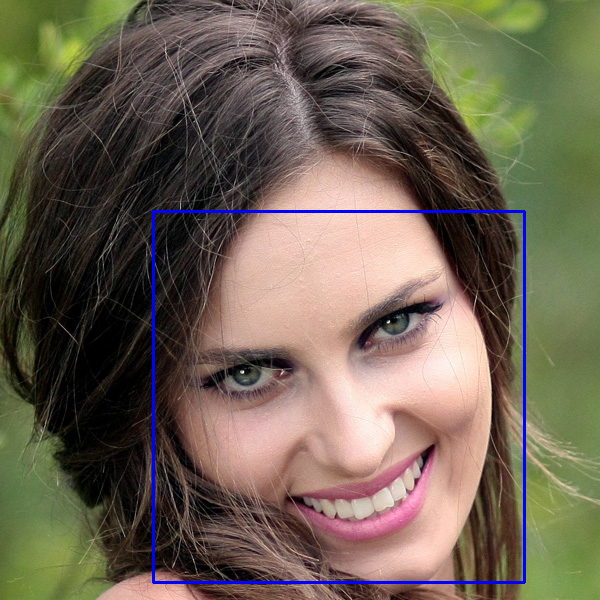

In [68]:
image_display = Image.fromarray(image9)
image_display

<strong>Conclusion</strong> <br>
1) the face detection was done using open cv 2 library <br>
2) the list of coordinates for all the images were captured and stored <br>
3) the results were tested with a few images and were satisfactory <br>